In [3]:
import torch
from diffusers import StableDiffusionPipeline
import os

def main():
    # 1. 기본 설정
    model_id = "CompVis/stable-diffusion-v1-4"
    lora_dir = "./runs/dreambooth_cat2_1000"
    output_dir = "outputs/generated_cat2_outputs"

    device = "cuda" if torch.cuda.is_available() else "cpu"
    dtype = torch.float16 if device == "cuda" else torch.float32

    # 출력 폴더 생성
    os.makedirs(output_dir, exist_ok=True)

    # 2. base Stable Diffusion 파이프라인 로드
    pipe = StableDiffusionPipeline.from_pretrained(
        model_id,
        torch_dtype=dtype,
    ).to(device)

    # 3. 학습한 LoRA 가중치 로드
    pipe.load_lora_weights(
        lora_dir,
        weight_name="pytorch_lora_weights.safetensors",
    )

    # 4. 10개의 다양한 프롬프트 리스트 (고양이 버전)
    prompts = [
        "A photo of sks cat sitting on a wooden table.",
        "A close-up portrait of sks cat with soft studio lighting.",
        "A photo of sks cat lying on a cozy blanket.",
        "A photo of sks cat in a green garden, shallow depth of field.",
        "A cinematic shot of sks cat walking in a dark alley.",
        "A photo of sks cat near a sunny window.",
        "A photo of sks cat playing with a toy mouse.",
        "A photo of sks cat sitting inside a cardboard box.",
        "A photo of sks cat outdoors in a forest during sunset.",
        "A cute photo of sks cat wearing a tiny hat.",
    ]

    negative_prompt = ""  # 필요 없으면 빈 문자열

    # 5. 10장의 이미지 생성
    for idx, prompt in enumerate(prompts):
        print(f"Generating image {idx+1}/{len(prompts)} ... Prompt: {prompt}")

        with torch.autocast(device) if device == "cuda" else torch.no_grad():
            image = pipe(
                prompt=prompt,
                negative_prompt=negative_prompt,
                num_inference_steps=30,
                guidance_scale=7.5,
            ).images[0]

        # 6. 파일로 저장
        save_path = os.path.join(output_dir, f"sks_cat_{idx+1}.png")
        image.save(save_path)
        print(f"Saved: {save_path}")

    print("Done! All cat images have been generated.")


if __name__ == "__main__":
    main()


Loading pipeline components...:  57%|█████▋    | 4/7 [00:00<00:00,  3.74it/s]/home/reproducepark/anaconda3/envs/cs492d/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  6.44it/s]


Generating image 1/10 ... Prompt: A photo of sks cat sitting on a wooden table.


100%|██████████| 30/30 [00:01<00:00, 23.33it/s]


Saved: outputs/generated_cat2_outputs/sks_cat_1.png
Generating image 2/10 ... Prompt: A close-up portrait of sks cat with soft studio lighting.


100%|██████████| 30/30 [00:01<00:00, 23.16it/s]


Saved: outputs/generated_cat2_outputs/sks_cat_2.png
Generating image 3/10 ... Prompt: A photo of sks cat lying on a cozy blanket.


100%|██████████| 30/30 [00:01<00:00, 22.61it/s]


Saved: outputs/generated_cat2_outputs/sks_cat_3.png
Generating image 4/10 ... Prompt: A photo of sks cat in a green garden, shallow depth of field.


100%|██████████| 30/30 [00:01<00:00, 22.91it/s]


Saved: outputs/generated_cat2_outputs/sks_cat_4.png
Generating image 5/10 ... Prompt: A cinematic shot of sks cat walking in a dark alley.


100%|██████████| 30/30 [00:01<00:00, 23.34it/s]


Saved: outputs/generated_cat2_outputs/sks_cat_5.png
Generating image 6/10 ... Prompt: A photo of sks cat near a sunny window.


100%|██████████| 30/30 [00:01<00:00, 23.34it/s]


Saved: outputs/generated_cat2_outputs/sks_cat_6.png
Generating image 7/10 ... Prompt: A photo of sks cat playing with a toy mouse.


100%|██████████| 30/30 [00:01<00:00, 23.37it/s]


Saved: outputs/generated_cat2_outputs/sks_cat_7.png
Generating image 8/10 ... Prompt: A photo of sks cat sitting inside a cardboard box.


100%|██████████| 30/30 [00:01<00:00, 23.18it/s]


Saved: outputs/generated_cat2_outputs/sks_cat_8.png
Generating image 9/10 ... Prompt: A photo of sks cat outdoors in a forest during sunset.


100%|██████████| 30/30 [00:01<00:00, 23.17it/s]


Saved: outputs/generated_cat2_outputs/sks_cat_9.png
Generating image 10/10 ... Prompt: A cute photo of sks cat wearing a tiny hat.


100%|██████████| 30/30 [00:01<00:00, 23.29it/s]


Saved: outputs/generated_cat2_outputs/sks_cat_10.png
Done! All cat images have been generated.


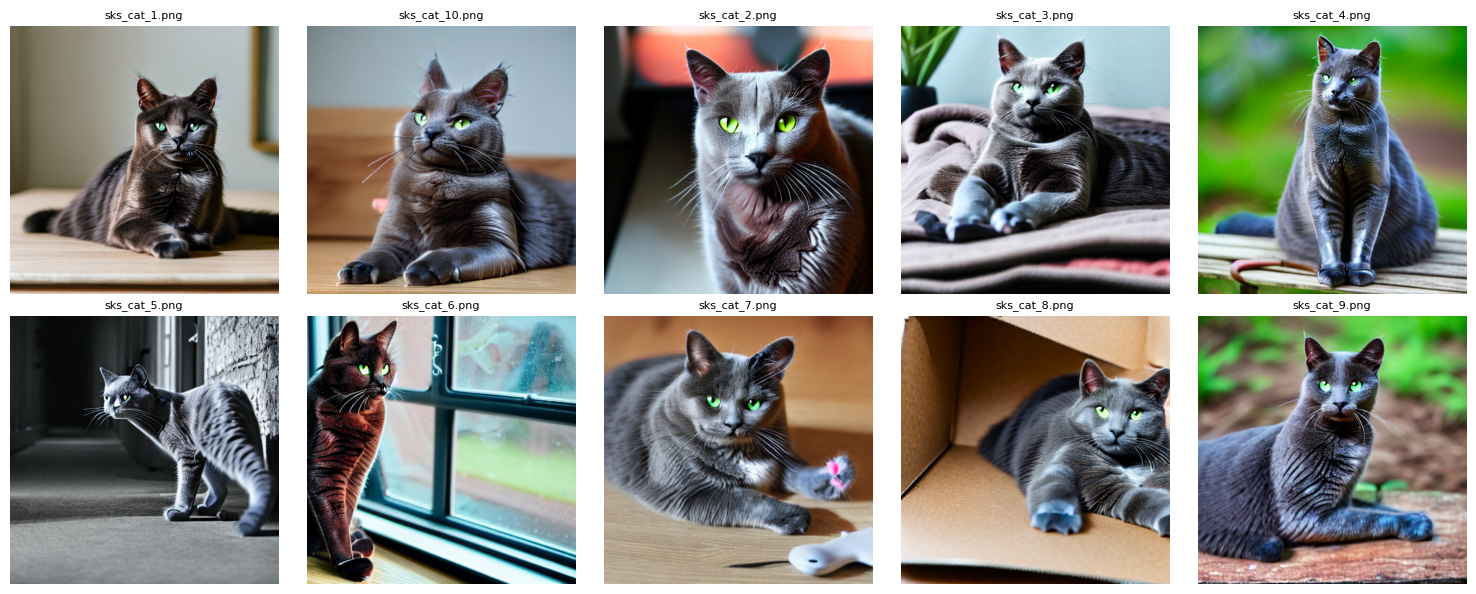

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# 저장된 10장의 고양이 이미지를 불러와서 시각화
output_dir = "outputs/generated_cat2_outputs"

# 폴더 안의 이미지 파일 목록 정렬 (최대 10장 사용)
image_files = sorted(
    [f for f in os.listdir(output_dir) if f.lower().endswith((".png", ".jpg", ".jpeg"))]
)[:10]

fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for ax, img_name in zip(axes.flatten(), image_files):
    img_path = os.path.join(output_dir, img_name)
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(img_name, fontsize=8)
    ax.axis("off")

plt.tight_layout()
plt.show()


In [6]:
from safetensors.torch import load_file

state = load_file("./runs/dreambooth_cat2_1000/pytorch_lora_weights.safetensors")
for key in state.keys():
    print(key)


unet.down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_k.lora.down.weight
unet.down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_k.lora.up.weight
unet.down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_out.0.lora.down.weight
unet.down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_out.0.lora.up.weight
unet.down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_q.lora.down.weight
unet.down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_q.lora.up.weight
unet.down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_v.lora.down.weight
unet.down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_v.lora.up.weight
unet.down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_k.lora.down.weight
unet.down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_k.lora.up.weight
unet.down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_out.0.lora.down.weight
unet.down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_out.0.lora.up.weight
unet.down_blocks.0.atten